ARCELORMITTAL METODO ARIMA




In [1]:
pip install pandas numpy matplotlib seaborn statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Paso 1: Cargar y preparar los datos**




In [2]:
df = pd.read_csv("/content/IBEX35_cotizaciones_20_Limpio.csv", sep=",")
df

,Fecha,Empresa,Precio_cierre
0,NaN,NaN,NaN
1,2005-04-01,ACCIONA,36.337158
2,2005-04-04,ACCIONA,35.794037
3,2005-04-05,ACCIONA,36.233715
4,2005-04-06,ACCIONA,36.388882
...,...,...,...
151101,2025-03-26,UNICAJA BANCO,1.774000
151102,2025-03-27,UNICAJA BANCO,1.749000
151103,2025-03-28,UNICAJA BANCO,1.710000
151104,2025-03-31,UNICAJA BANCO,1.706000


In [3]:
df_acerlor = df[df["Empresa"] == "ARCELORMITTAL"]

In [4]:
df_acerlor.to_csv('df_acerlor.csv', index=False)

In [5]:
df_acerlor['Fecha'] = pd.to_datetime(df_acerlor['Fecha'], errors='coerce')


<ipython-input-5-1b1e44aa16d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acerlor['Fecha'] = pd.to_datetime(df_acerlor['Fecha'], errors='coerce')


In [6]:
#Seleccionar solo las columnas necesarias y establecer el índice
df_acerlor = df_acerlor[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [7]:
df_acerlor.isnull().sum()

,0
Precio_cierre,0


In [8]:
df_acerlor

,Precio_cierre
Fecha,
2006-07-28,38.593395
2006-07-31,39.471867
2006-08-01,40.037670
2006-08-02,39.412304
2006-08-03,39.903667
...,...
2025-03-26,28.930000
2025-03-27,27.750000
2025-03-28,26.820000


**Paso 2: Visualizar la serie temporal**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

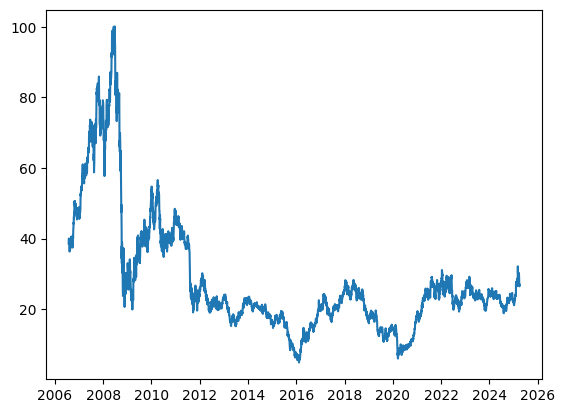

In [10]:
plt.plot(df_acerlor)

**PASO 3: Descomposición de la serie para ver estacionalidad**

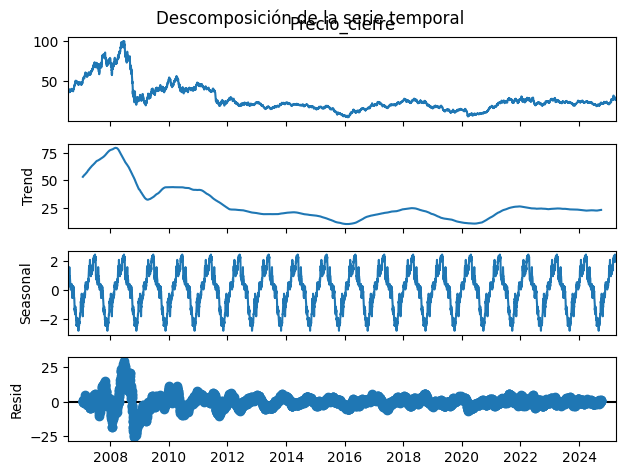

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva con frecuencia anual (252 días hábiles)
decomposicion = seasonal_decompose(df_acerlor['Precio_cierre'], model='additive', period=252)

# Mostrar los componentes
decomposicion.plot()
plt.suptitle('Descomposición de la serie temporal')
plt.show()


**Paso 3: Comprobar si es estacionaria (ADF test)**

In [12]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df_acerlor["Precio_cierre"])
print("ADF Statistic:", resultado[0])
print("p-value:", resultado[1])


ADF Statistic: -2.167613652277418
p-value: 0.21820904687832804


p-valor > 0.05 -> la serie NO es estacionaria -> necesita diferenciacion

**Paso 4: Diferenciación**

In [13]:
# NO sobrescribas la columna original
df_acerlor["Close_diff"] = df_acerlor["Precio_cierre"].diff()

# ADF sobre la serie diferenciada (sin nulos)
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_acerlor["Close_diff"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -12.566568438406602
p-value: 2.0473165941169643e-23


In [14]:
df_acerlor.dropna(inplace=True)

In [15]:
df_acerlor

,Precio_cierre,Close_diff
Fecha,,
2006-07-31,39.471867,0.878471
2006-08-01,40.037670,0.565804
2006-08-02,39.412304,-0.625366
2006-08-03,39.903667,0.491364
2006-08-04,38.950748,-0.952919
...,...,...
2025-03-26,28.930000,-0.570000
2025-03-27,27.750000,-1.180000
2025-03-28,26.820000,-0.930000


**PASO 6: Identificar parametros**

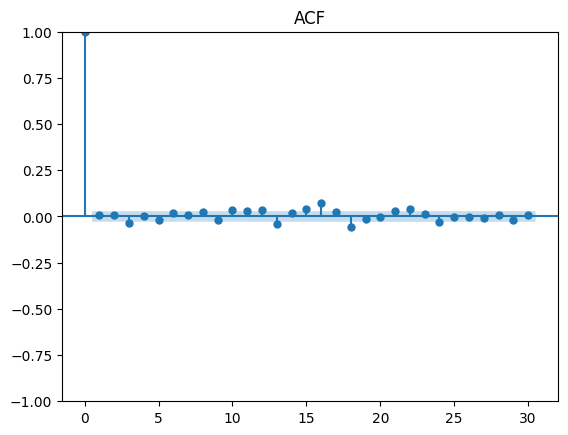

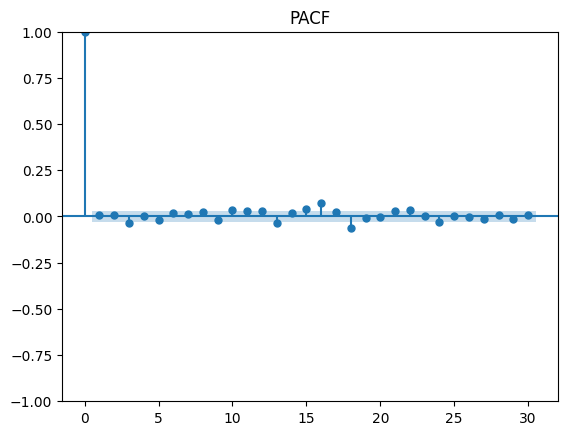

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF (para q)
plot_acf(df_acerlor['Close_diff'].dropna(), lags=30)
plt.title("ACF")
plt.show()

# PACF (para p)
plot_pacf(df_acerlor['Close_diff'].dropna(), lags=30)
plt.title("PACF")
plt.show()


**PASO 7: AJUSTAR SARIMA**

In [17]:
# Fecha de corte
fecha_corte = '2022-04-01'

train = df_acerlor.loc[:fecha_corte]['Precio_cierre']
test = df_acerlor.loc[fecha_corte:]['Precio_cierre']


In [2]:
!pip install numpy==1.23.5
!pip install pmdarima --force-reinstall --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is inco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
^C


In [22]:
from pmdarima import auto_arima

modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=5,  # frecuencia semanal laboral (ajustable)
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=10833.735, Time=17.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=10830.799, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=10832.650, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=10832.797, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=10828.836, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=10830.749, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=10830.894, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=10831.571, Time=5.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=10832.722, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=10832.723, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=10834.722, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 28.494 seconds


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 seasonal_order=modelo_auto.seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


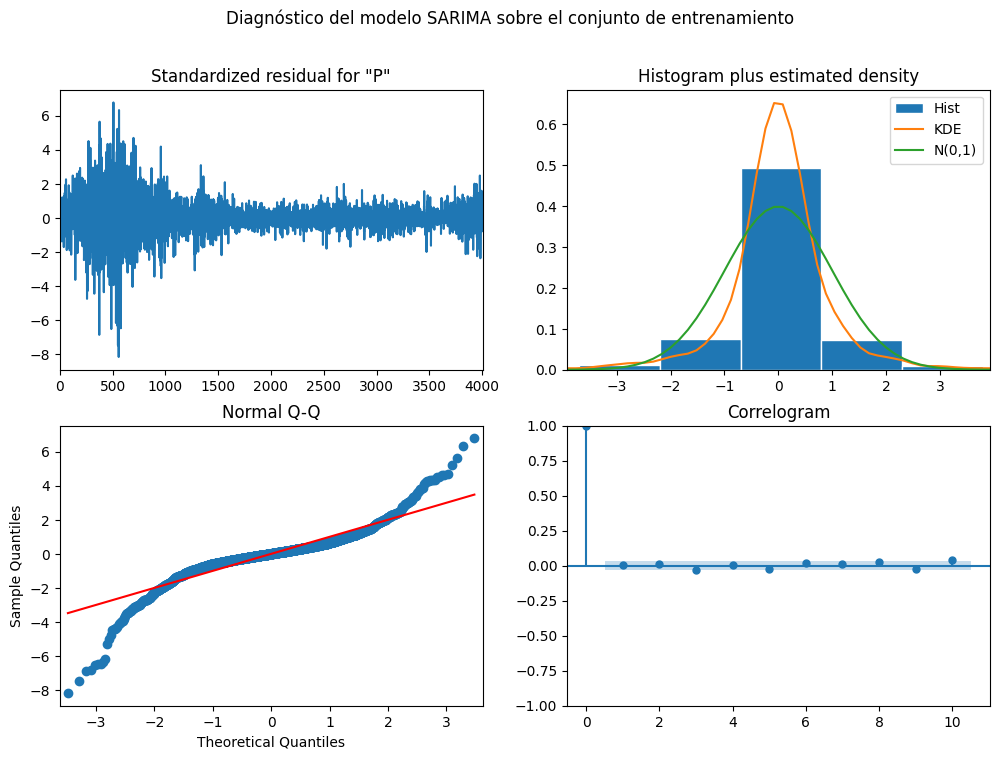

In [24]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()


In [25]:
# Número de pasos a predecir
n_periods = len(test)

# Predecir
forecast = modelo_fit.forecast(steps=n_periods)

# Alinear índices
forecast.index = test.index


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 4.9699


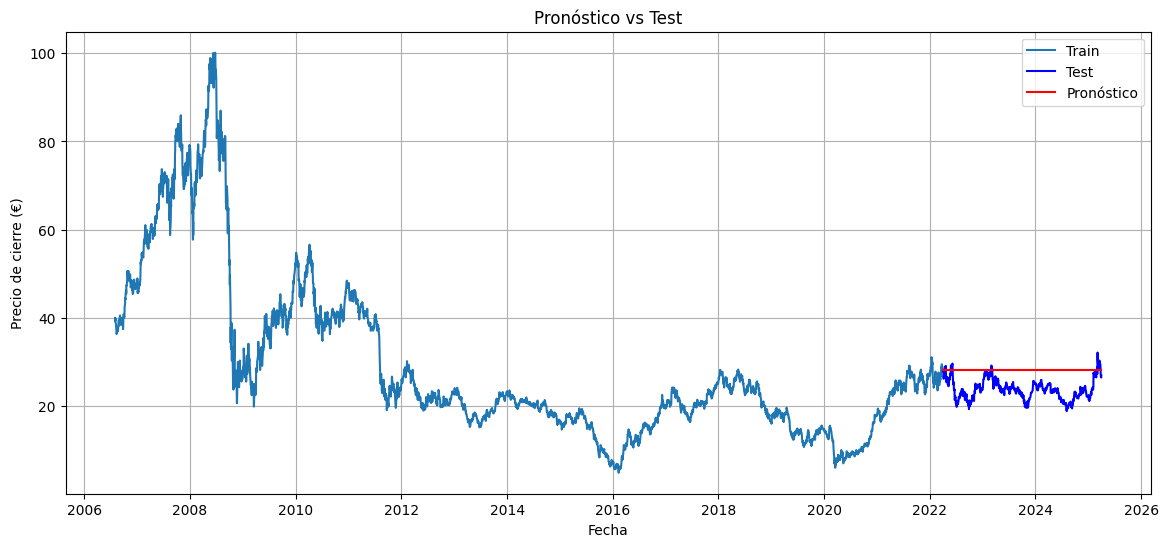

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico vs Test')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()


INCLUIR T DE TENDENCIA PARA QUE NO SEA UNA LINEA RECTA

In [28]:
from pmdarima import auto_arima

modelo_auto = auto_arima(train,
                         seasonal=False,  # sin SARIMA
                         trend='t',       # incluye tendencia
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10836.894, Time=2.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10830.835, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10832.757, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10832.760, Time=1.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10830.835, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10834.835, Time=4.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.499 seconds


In [29]:
# 2. Ajuste SARIMAX con tendencia explícita
modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 trend='t',  # ← incluye la tendencia lineal
                 enforce_stationarity=False,
                 enforce_invertibility=False)
modelo_fit = modelo.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


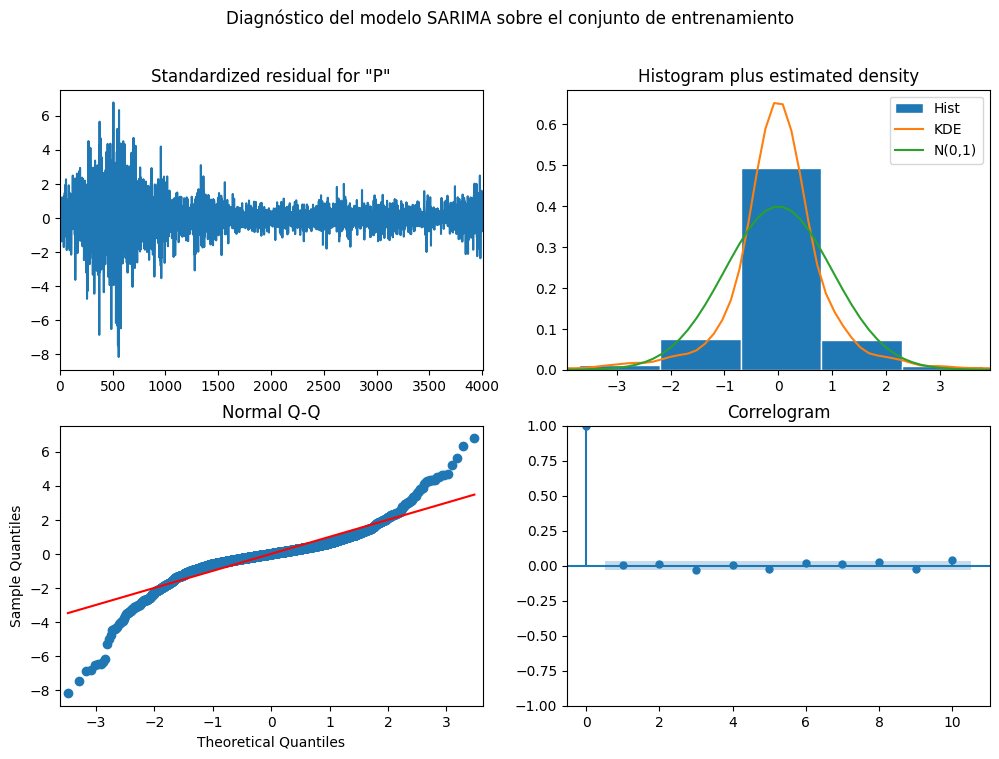

In [30]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


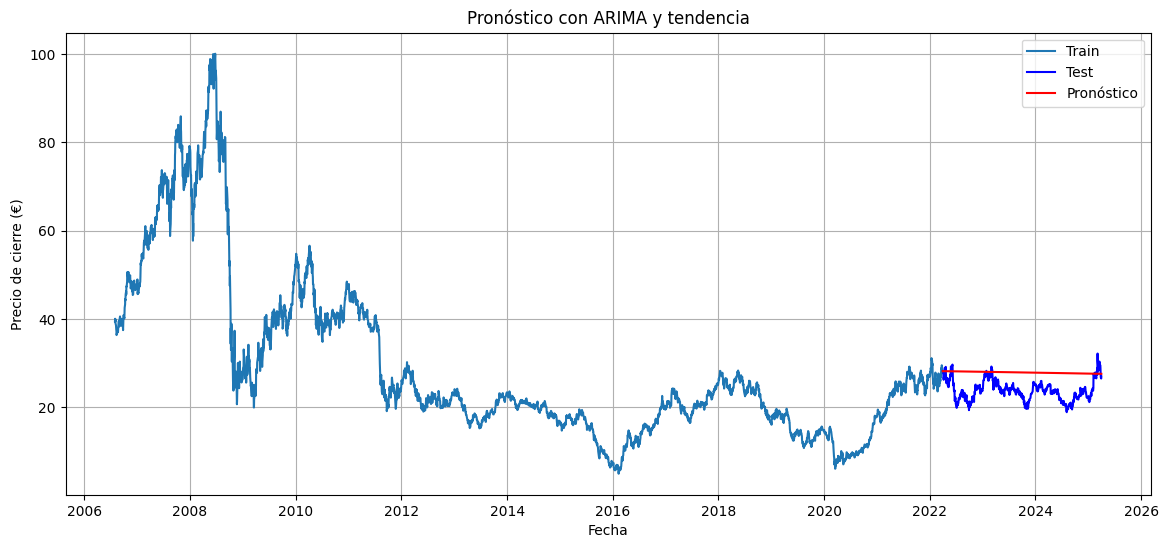

In [31]:
# 3. Forecast alineado al test
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA y tendencia')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Asegúrate de alinear los índices (ya lo hiciste)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 4.7043


PRUEBA CON ESTACIONALIDAD MES BURSATIL

In [33]:
from pmdarima import auto_arima
modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=21,
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[21] intercept   : AIC=10829.364, Time=34.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=10830.799, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=10831.111, Time=3.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=10831.188, Time=3.74 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=10828.836, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[21] intercept   : AIC=10829.150, Time=3.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[21] intercept   : AIC=10829.227, Time=3.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[21] intercept   : AIC=10830.336, Time=10.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=10832.722, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=10832.723, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=10834.722, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[21]          
Total fit time: 59.447 seconds


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 seasonal_order=modelo_auto.seasonal_order,
                 trend='t',
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


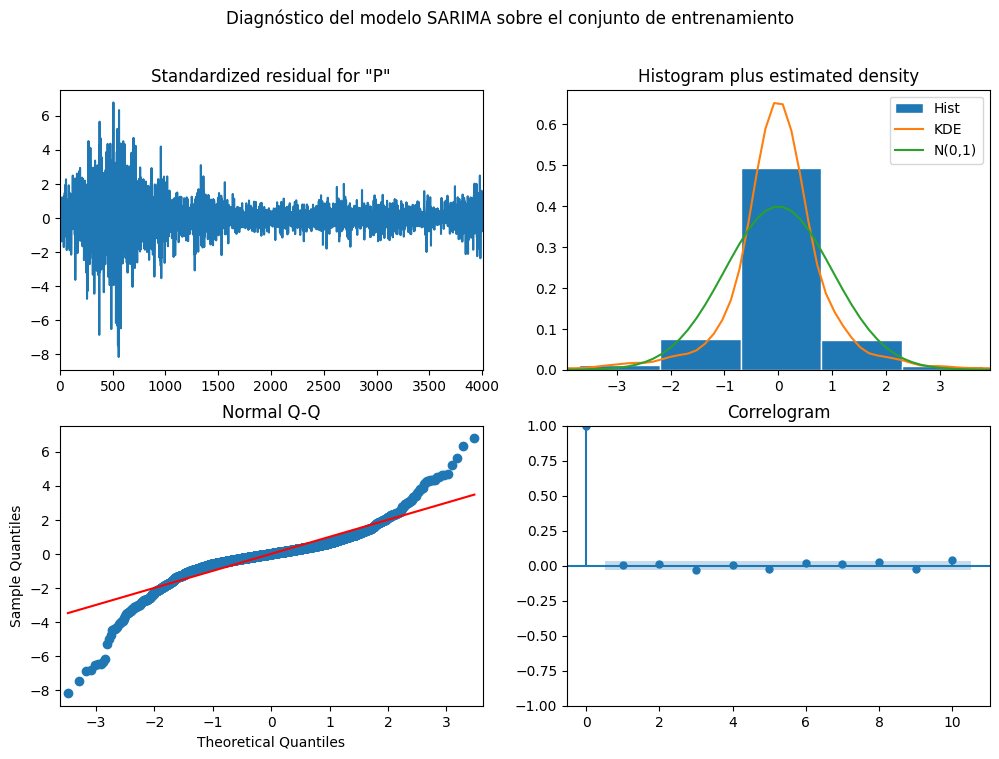

In [35]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


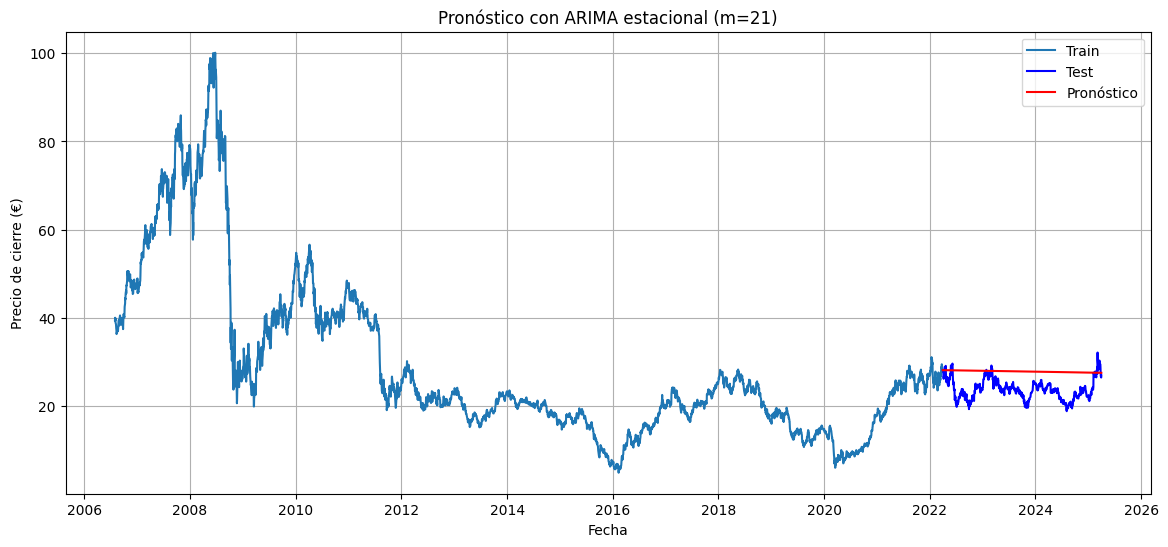

In [36]:
# Forecast para el periodo de test
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index  # muy importante

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA estacional (m=21)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 4.7043


MODELO SEGUN GRAFICAS ACF-PACF:

ARIMA(1,1,1)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=(1, 1, 1),
                 enforce_stationarity=False,
                 enforce_invertibility=False)
modelo_fit = modelo.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


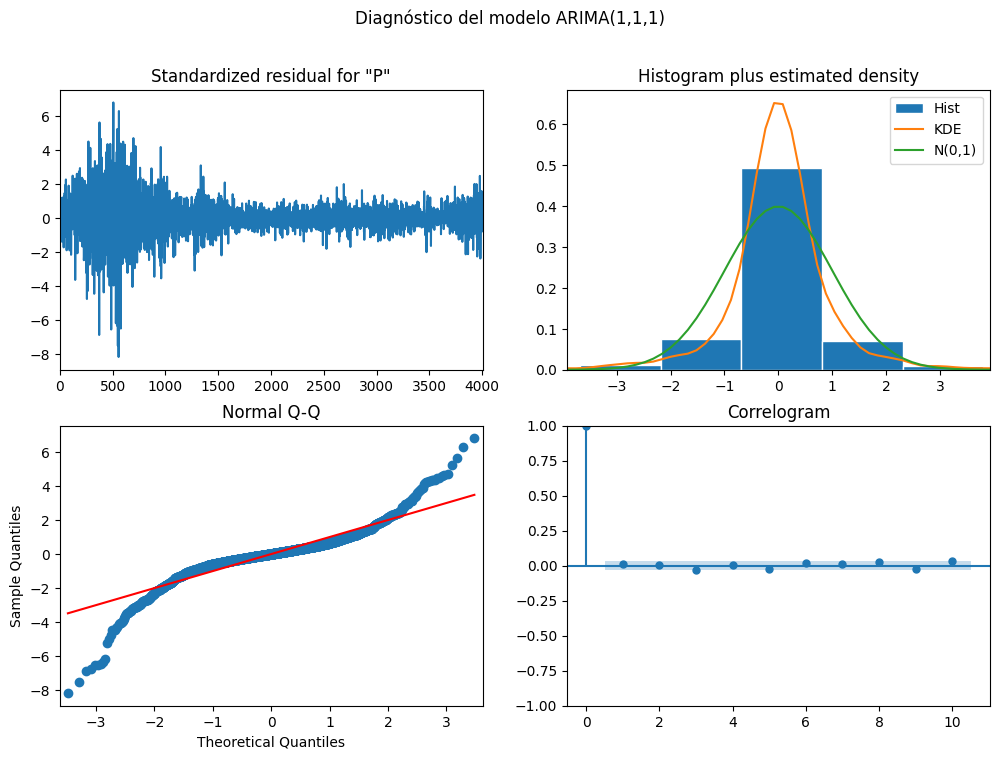

In [19]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle("Diagnóstico del modelo ARIMA(1,1,1)")
plt.show()

1. Residuos estandarizados (gráfico superior izquierdo)
Se observa cierta mayor varianza al inicio, pero luego los residuos se estabilizan y están centrados en cero.

No hay patrón cíclico ni tendencia evidente.

✔️ Aceptable.

2. Histograma + KDE
La distribución es aproximadamente simétrica, centrada en cero.

KDE (naranja) ligeramente más picuda que la normal teórica (verde) → ligera leptocurtosis.

✔️ Adecuado para predicción puntual.

3. Normal Q-Q Plot
Coincide bastante bien con la línea roja, salvo en los extremos (colas).

Hay algunos outliers, pero no afectan demasiado si no se requieren intervalos de confianza muy precisos.

⚠️ No normal al 100%, pero aceptable.

4. Correlograma (ACF de residuos)
Todos los valores están dentro del intervalo de confianza, excepto el lag 0 (esperado).

No hay autocorrelación → ✔️ esto es lo más importante para que un modelo ARIMA sea válido.

✅ Perfecto desde el punto de vista de autocorrelación.

🟢 Conclusión
Sí, el modelo ARIMA(1,1,1) es válido para esta serie df_acerlor, especialmente si tu objetivo es hacer predicciones puntuales (como RMSE o MAE).
No es necesario ajustar un modelo más complejo si este ya captura la dinámica de la serie.

¿Quieres ahora que hagamos la predicción sobre test, la grafiquemos y calculemos el RMSE? Puedo darte el bloque de código si lo deseas.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


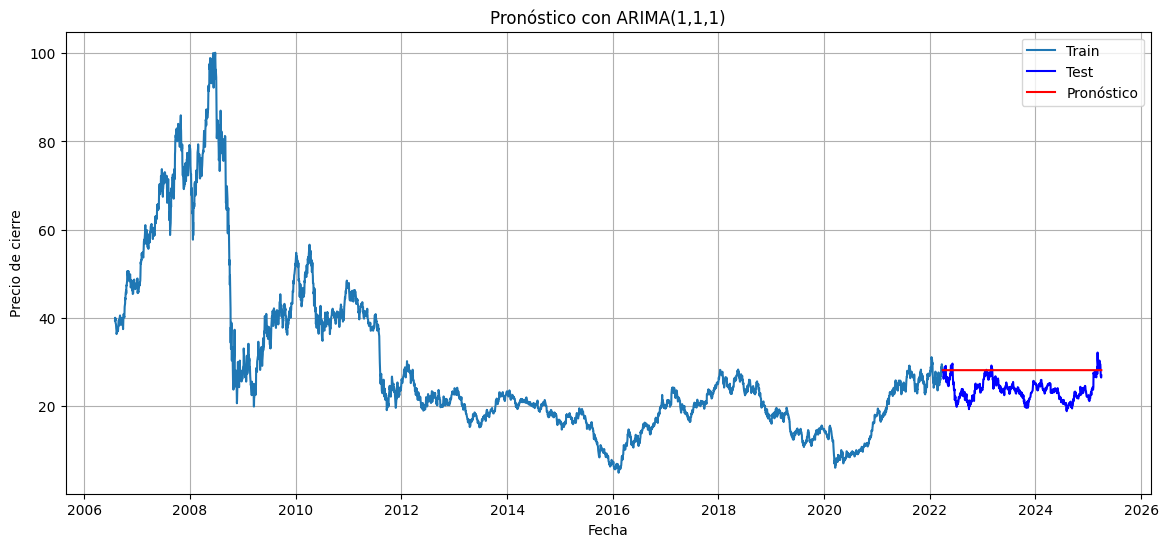

In [20]:
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index  # alineamos las fechas

# 4️Gaficar predicción vs test
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA(1,1,1)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 4.9683


PRUEBA ESTACIONALIDAD AÑO BURSATIL

In [ ]:
from pmdarima import auto_arima
modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=252,
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
